In [ ]:
!pip install scanpy

In [ ]:
!pip install gseapy

In [ ]:
!pip install igraph leidenalg

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import gseapy as gp
import networkx as nx

In [6]:
raw_data = pd.read_csv("/content/gene_raw_data.csv" , sep="," , index_col=0)

In [7]:
raw_data

,WMC2659745,WMC2659746,WMC2659747,WMC2659748,WMC2659749,WMC2659750,WMC2659751,WMC2659752,WMC2659753,WMC2659754,...,WMC2660119,WMC2660120,WMC2660121,WMC2660122,WMC2660123,WMC2660124,WMC2660125,WMC2660126,WMC2660127,WMC2660128
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2MP1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAS,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
AACS,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoU13,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoU2-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoU2_19,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
snoZ196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
raw_data = raw_data.select_dtypes(include=["number"])

In [9]:
adata = sc.AnnData(raw_data.T)

Log normalization

In [10]:
sc.pp.log1p(adata)

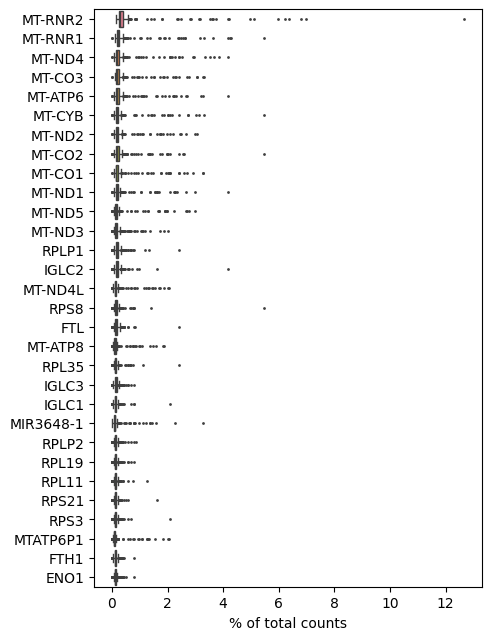

In [11]:
sc.pl.highest_expr_genes(adata, n_top=30)

**Key Findings & Interpretations:**

* **High Mitochondrial Activity:** Strong expression of multiple mitochondrial genes (MT-RNR2, MT-RNR1, MT-NDs, MT-COs, MT-ATP6, MT-CYB) indicates robust mitochondrial respiration and likely a high energy demand within the cells.
* **Active Protein Synthesis:** Abundant ribosomal protein gene expression (RPLs and RPSs) suggests active protein synthesis, consistent with a high metabolic rate, cell growth, or proliferation.
* **Possible Immune Involvement:** The presence of immunoglobulin genes (IGLC2, IGLC3, IGLC1, JCHAIN), though at relatively lower levels, hints at a potential immune response or the presence of B cells.
* **Iron Regulation:** Expression of FTL and FTH1 suggests active management of iron levels, likely linked to the high metabolic activity and mitochondrial function.
* **Glycolysis Activity:** The presence of ENO1 and PKM indicates active glycolysis, supporting the high energy demand suggested by mitochondrial gene expression.
* **Potential Stress Response:** HSP90AB1 expression may indicate a stress response, but it's a common protein with multiple functions.
* **Relative Expression Data:** Remember that the box plot represents *relative* gene expression levels, not absolute amounts of mRNA or protein.
* **Need for Context:** A more accurate interpretation necessitates considering the specific biological context (tissue, cell type, experimental conditions) of the dataset.

The gene expression profile strongly suggests a sample enriched with myeloma cells. The high expression of genes related to mitochondrial activity, protein synthesis (especially immunoglobulin production), and cell growth is consistent with the behavior of cancerous plasma cells.  The data reinforces that these cells are actively producing antibodies, growing, and dividing, which are the key characteristics of multiple myeloma

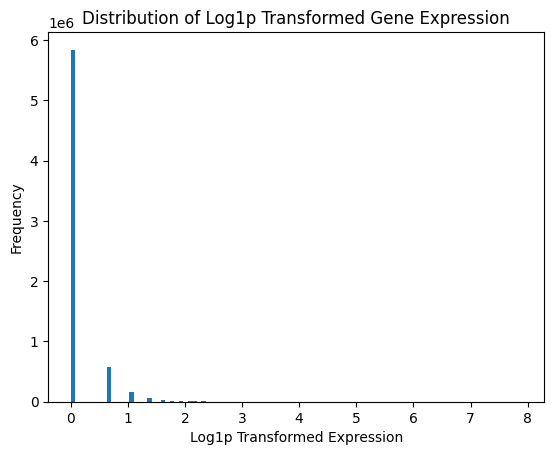

In [12]:
plt.hist(adata.X.flatten(), bins=100)
plt.xlabel("Log1p Transformed Expression")
plt.ylabel("Frequency")
plt.title("Distribution of Log1p Transformed Gene Expression")
plt.show()

In [13]:
adata = adata[~np.isnan(adata.X).any(axis=1)]

sc.tl.pca(adata, svd_solver="arpack")

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


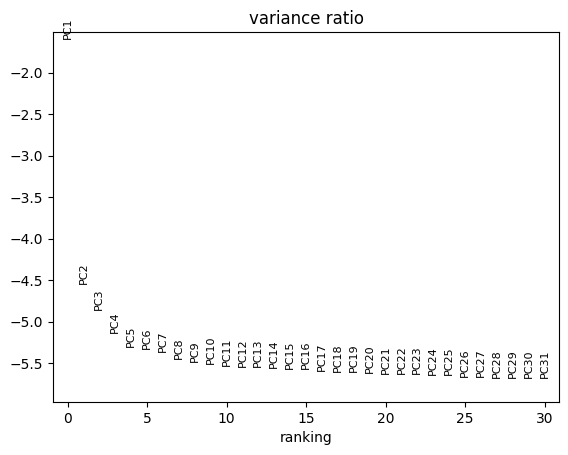

In [14]:
sc.pl.pca_variance_ratio(adata ,log=True)

In [15]:
adata.obs["PC1"] = adata.obsm["X_pca"][:,0]
adata.obs["PC2"] = adata.obsm["X_pca"][:,1]
adata.obs["PC3"] = adata.obsm["X_pca"][:,2]

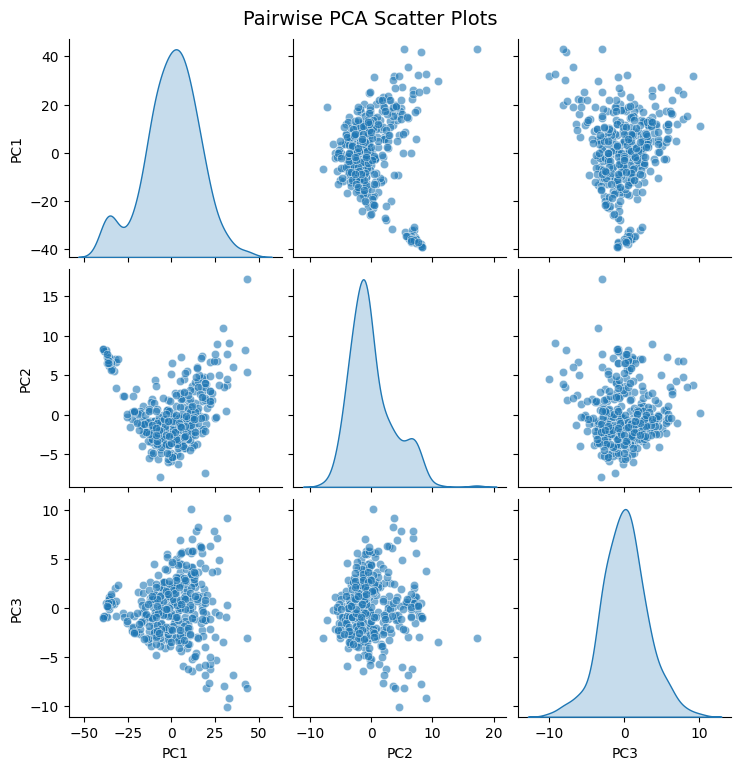

In [16]:
sns.pairplot(adata.obs, vars=["PC1", "PC2", "PC3"], diag_kind="kde", plot_kws={"alpha": 0.6})
plt.suptitle("Pairwise PCA Scatter Plots", y=1.02, fontsize=14)
plt.show()

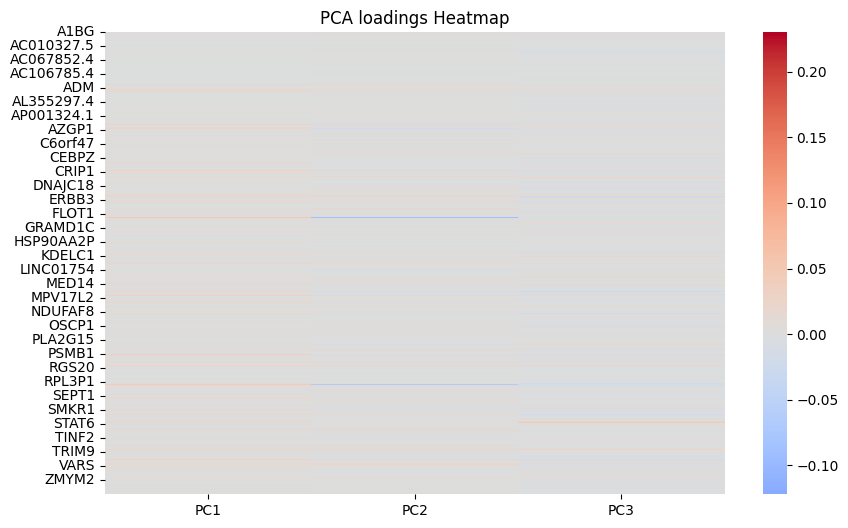

In [17]:
df_pca_loadings = pd.DataFrame(adata.varm["PCs"][: , :3] , index=adata.var_names , columns=["PC1","PC2","PC3"])
plt.figure(figsize=(10,6))
sns.heatmap(df_pca_loadings ,cmap="coolwarm",center=0,annot=False)
plt.title("PCA loadings Heatmap")
plt.show()

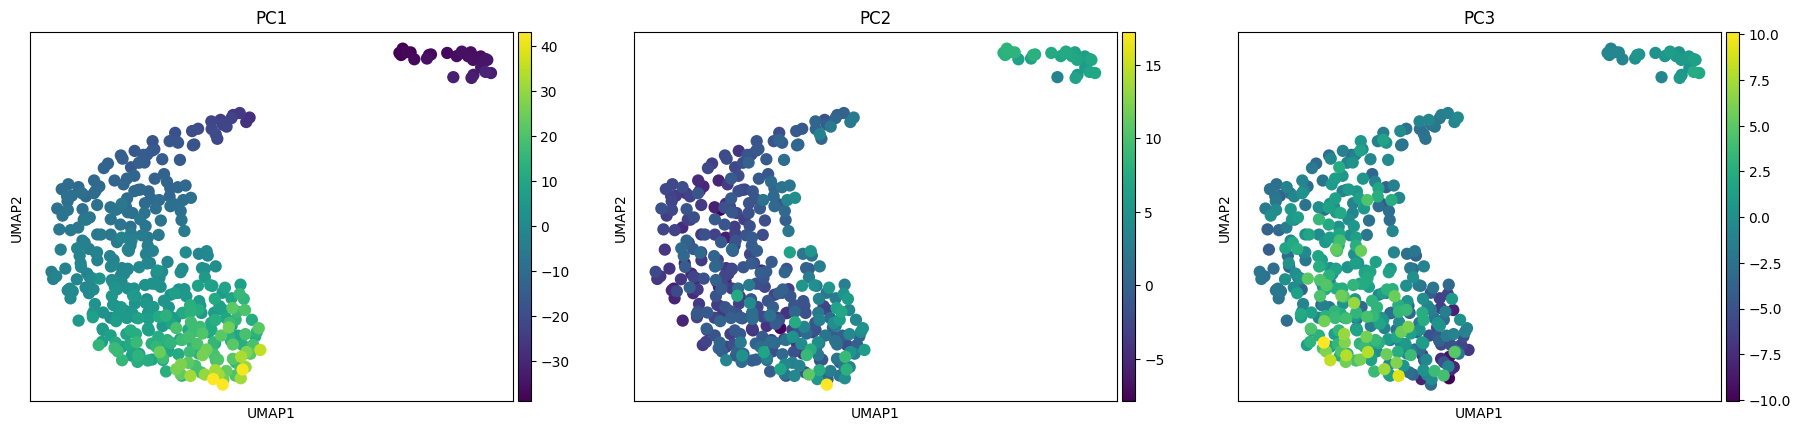

In [18]:
sc.pp.neighbors(adata,use_rep="X_pca")
sc.tl.umap(adata)
sc.pl.umap(adata,color=["PC1","PC2","PC3"])

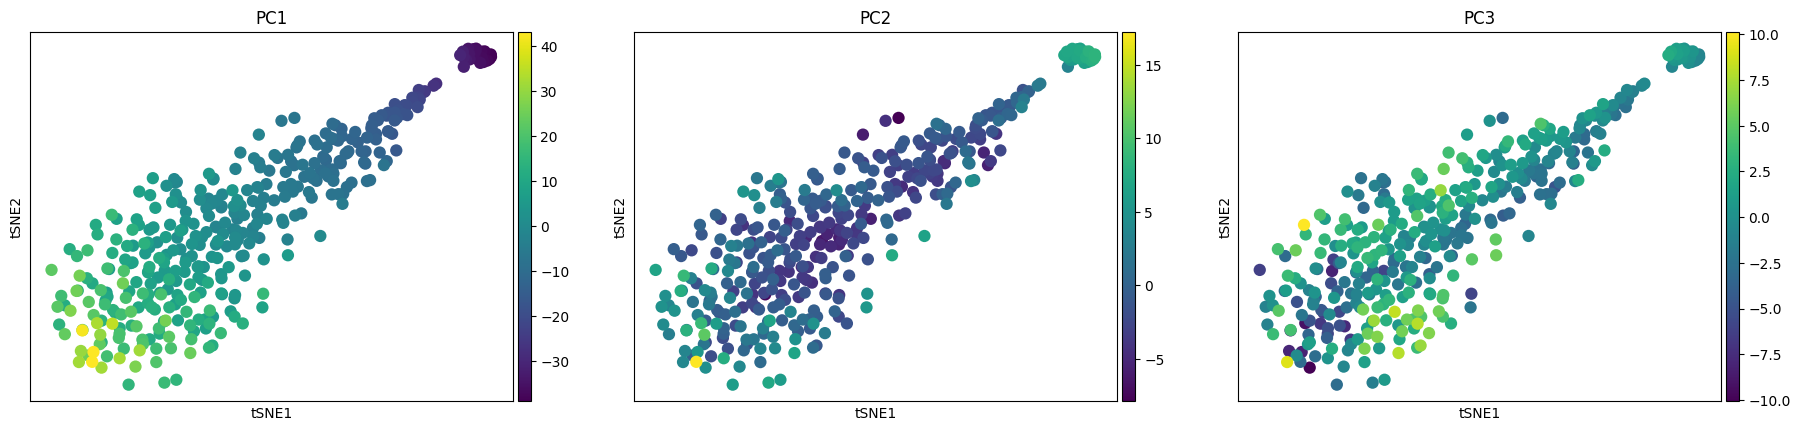

In [19]:
sc.tl.tsne(adata,use_rep="X_pca")
sc.pl.tsne(adata,color=["PC1","PC2","PC3"])

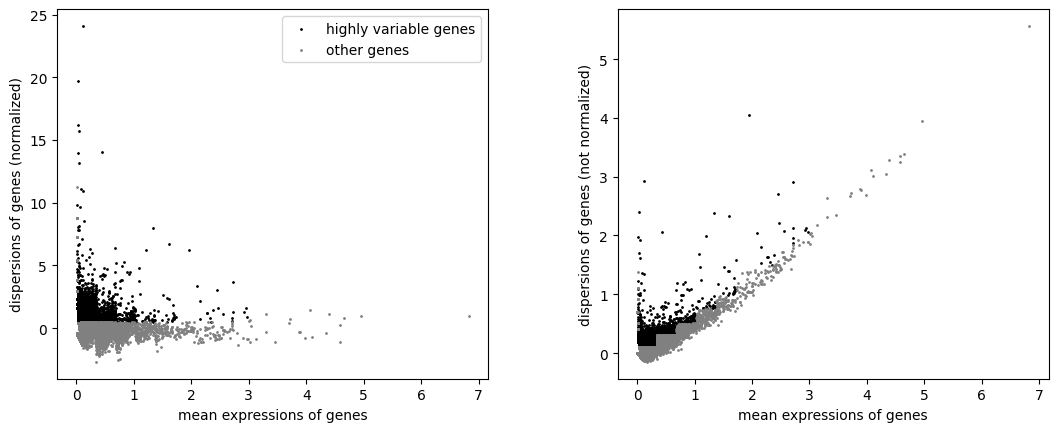

In [20]:
sc.pp.highly_variable_genes(adata,flavor="seurat")
sc.pl.highly_variable_genes(adata)

In [21]:
sc.pp.highly_variable_genes(adata,min_mean=0.1 ,max_mean=3,min_disp=0.5)
top_variable_genes = adata.var[adata.var["highly_variable"]].index.tolist()

In [22]:
print(top_variable_genes)
print(len(top_variable_genes))

['AARS', 'AATF', 'ABCC4', 'ABCF1', 'ABCF3', 'ABHD11', 'ABHD17C', 'ABHD3', 'ABI1', 'ABL1', 'ABL2', 'ABRACL', 'ABT1', 'AC005394.2', 'AC005943.1', 'AC008072.1', 'AC008770.1', 'AC009403.1', 'AC009948.1', 'AC010343.1', 'AC012085.1', 'AC012181.2', 'AC016734.1', 'AC016739.1', 'AC018475.1', 'AC023310.4', 'AC025857.2', 'AC027309.2', 'AC040162.3', 'AC048334.1', 'AC068547.1', 'AC073896.4', 'AC074033.1', 'AC078814.1', 'AC078817.1', 'AC078927.1', 'AC084759.2', 'AC090897.1', 'AC092017.1', 'AC093768.1', 'AC097637.1', 'AC099329.1', 'AC100861.1', 'AC104024.1', 'AC107871.1', 'AC129507.1', 'AC145207.5', 'ACACA', 'ACAD9', 'ACBD3', 'ACBD6', 'ACIN1', 'ACOT9', 'ACSL3', 'ACSL4', 'ACTG1', 'ACY1', 'ACYP1', 'ADA', 'ADAM10', 'ADAM9', 'ADAR', 'ADARB1', 'ADCK2', 'ADCY1', 'ADD1', 'ADGRE5', 'ADIPOR2', 'ADK', 'ADSS', 'ADTRP', 'AFAP1L2', 'AGAP3', 'AGFG1', 'AGK', 'AGMAT', 'AGO3', 'AGPAT1', 'AGPAT2', 'AGPAT3', 'AGPAT5', 'AHCTF1', 'AHCYL1', 'AHNAK', 'AIFM1', 'AK6', 'AKAP11', 'AKAP13', 'AKAP2', 'AKAP8', 'AKAP8L', 'AKAP9', 

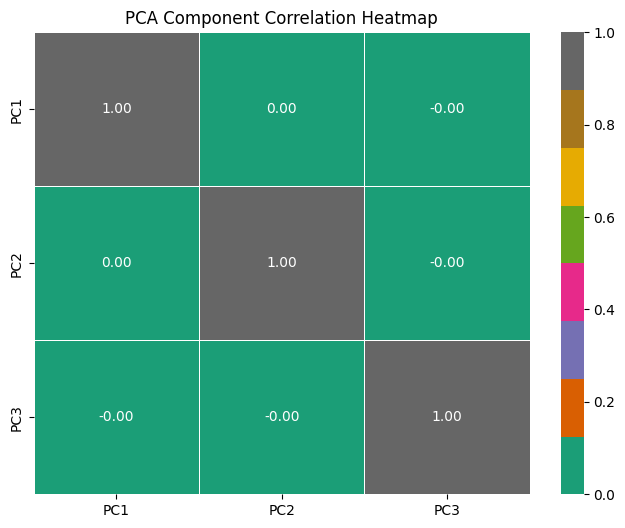

In [23]:
df_pca = pd.DataFrame(adata.obsm["X_pca"][:,:3] , columns=["PC1","PC2","PC3"])
plt.figure(figsize=(8,6))
sns.heatmap(df_pca.corr(),annot=True,cmap="Dark2",fmt=".2f",linewidth=0.5)
plt.title("PCA Component Correlation Heatmap")
plt.show()

**11. Gene Expression CDF Plot**

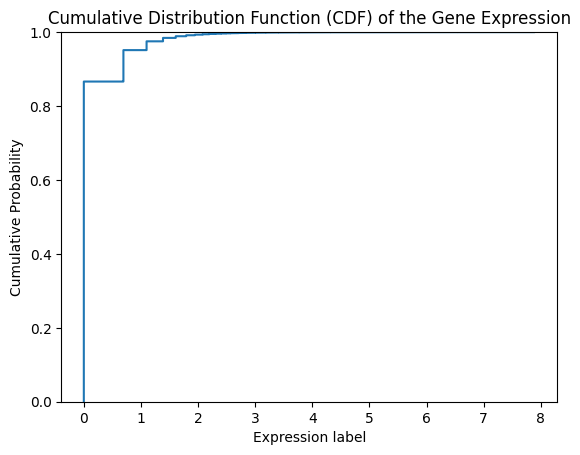

In [24]:
sns.ecdfplot(adata.X.flatten())
plt.title("Cumulative Distribution Function (CDF) of the Gene Expression")
plt.xlabel("Expression label")
plt.ylabel("Cumulative Probability")
plt.show()

**Network Visualization of highly variable genes**

In [25]:
top_200_genes = top_variable_genes[:200]
gene_correlation = np.corrcoef(adata[:,top_200_genes].X.T)

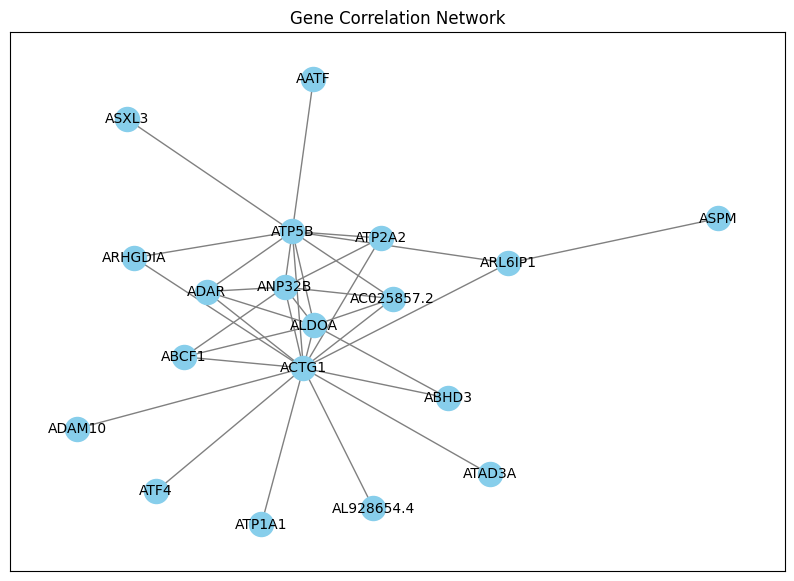

In [26]:
G = nx.Graph()

for i ,gene1 in enumerate(top_200_genes):
  for j , gene2 in enumerate(top_200_genes):
    if i!=j  and abs(gene_correlation[i,j]) > 0.4:
      G.add_edge(gene1,gene2, weight=gene_correlation[i,j])

plt.figure(figsize=(10,7))
nx.draw_networkx(G , with_labels=True ,node_color="skyblue",edge_color="gray",font_size=10)
plt.title("Gene Correlation Network")
plt.show()

# Gene Functions and Potential Interrelationships (Based on Literature):

* **ACTG1 (Actin, Gamma 1)**: A major component of the cytoskeleton, involved in cell structure, shape, and movement. Its central position suggests it could be a key regulator of cellular processes.

* **ATP5B (ATP Synthase Subunit Beta)**: A component of ATP synthase, the enzyme that produces ATP (cellular energy). Its connections to other genes suggest a link between energy production and other cellular processes.

* **ANP32B (ANP32 Family Member B):** Involved in various cellular processes, including chromatin remodeling, gene regulation, and signal transduction. Its connections suggest it might play a regulatory role in the network.

* **ABCF1 (ATP Binding Cassette Subfamily C Member 1):** An ABC transporter, involved in transporting various molecules across cell membranes. Its connections suggest it might be related to the transport of metabolites or other signaling molecules.


* **ATF4 (Activating Transcription Factor 4):** A transcription factor involved in the cellular stress response, particularly the unfolded protein response (UPR). Its presence suggests stress might be a factor in the processes represented by the network



---



# Interrelationships (Inferred from the Network):

* **ACTG1 and Cytoskeleton-Related Processes:** ACTG1's connections to other genes likely indicate its involvement in coordinating cell structure and movement with other cellular functions.

* **ATP5B and Energy Metabolism:** ATP5B's connections suggest that energy production is linked to other processes represented in the network.

* **ANP32B and Regulation:** ANP32B's connections suggest it might be involved in regulating the expression or activity of other genes in the network




---



# UMAP (Uniform Manifold Approximation and Projection)

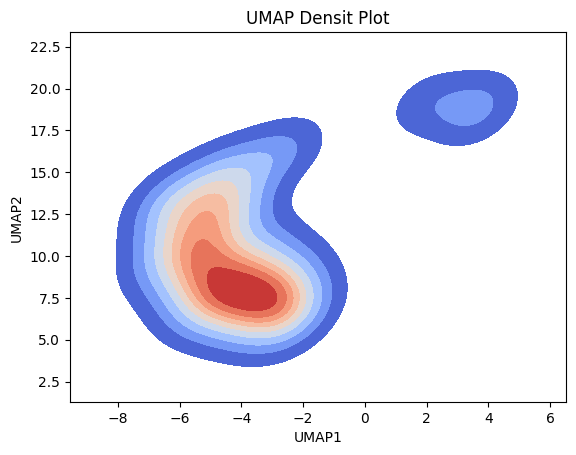

In [27]:
sns.kdeplot(x=adata.obsm["X_umap"][:,0], y=adata.obsm["X_umap"][:,1],fill=True,cmap="coolwarm")
plt.title("UMAP Densit Plot")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()

* **Myeloma Subtypes:** High-density regions in the UMAP density plot may correspond to distinct subtypes of myeloma cells.

* **Heterogeneity:** The shape and distribution of density peaks can provide insights into the heterogeneity of your MM samples. Multiple distinct peaks suggest the presence of different populations of myeloma cells.

In [28]:
libraries = gp.get_library_name()
print(libraries)
print(len(libraries))

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DGIdb_Drug_Targets_2024', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_CRISPR_GeneDependency_CellLines_2023', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and

<Axes: title={'center': 'Pathway Enrichment'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

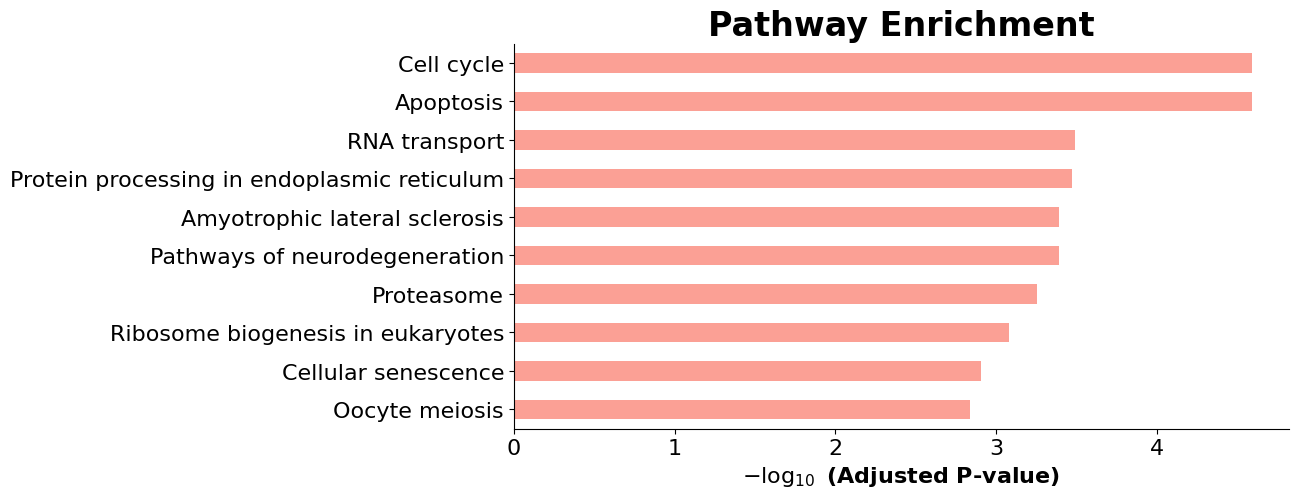

In [29]:
enrichment = gp.enrichr(
    gene_list=top_variable_genes,
    gene_sets="KEGG_2021_Human",
    organism="human"
)
gp.barplot(enrichment.res2d, title="Pathway Enrichment" ,figsize=(10,5))

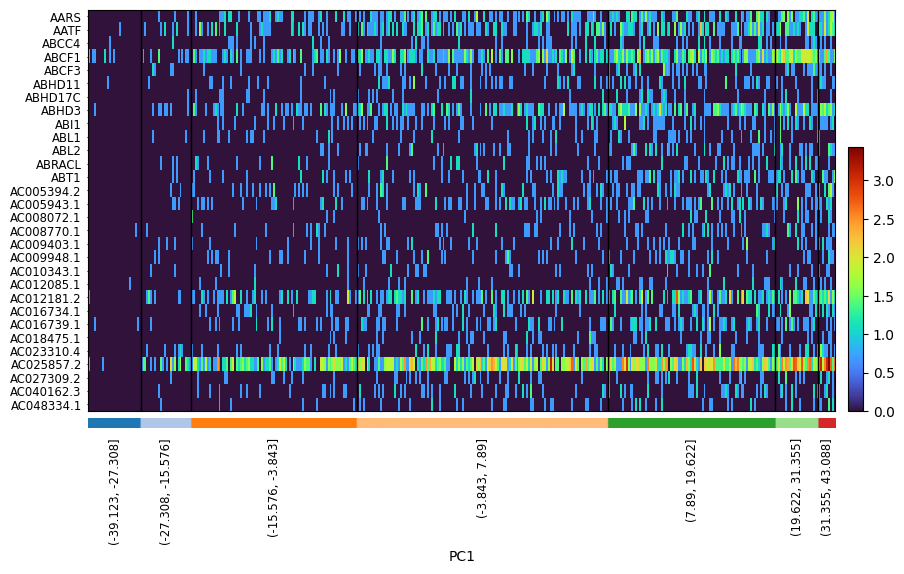

In [30]:
sc.pl.heatmap(adata,var_names=top_200_genes[:30],groupby="PC1",cmap="turbo",swap_axes=True)

# Conclusions Derived from this Heatmap

The distinct gene expression patterns across PC1 groups suggest the possibility of molecularly distinct subtypes of MM.
Example: One group might show high expression of genes related to proliferation, while another might show high expression of genes related to drug resistance. These subtypes might respond differently to treatment.


Genes that are highly expressed in specific PC1 groups, especially if those groups are associated with poor prognosis or drug resistance, could represent potential therapeutic targets.
Example: If a gene essential for myeloma cell survival is highly expressed in a high-risk PC1 group, developing a drug to inhibit that gene could be a promising therap


**Dendrogram Visualization**

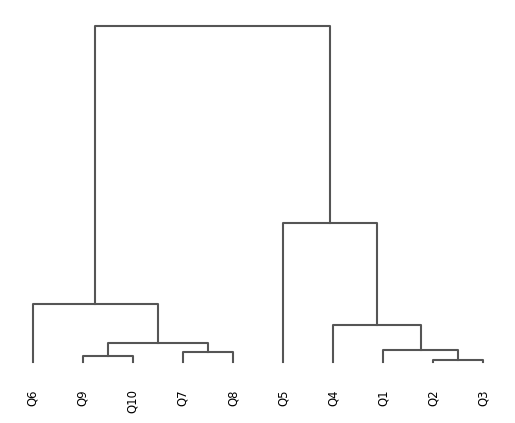

<Axes: >

In [31]:
adata.obs["PC1_category"] = pd.qcut(adata.obs["PC1"], q=10, labels=[f"Q{i}" for i in range(1, 11)])

sc.tl.dendrogram(adata, groupby="PC1_category")
sc.pl.dendrogram(adata, groupby="PC1_category")

In [32]:
adata.obs["PC2_category"] = pd.qcut(adata.obs["PC2"], q=10, labels=[f"Q{i}" for i in range(1, 11)])
adata.obs["PC3_category"] = pd.qcut(adata.obs["PC3"], q=10, labels=[f"Q{i}" for i in range(1, 11)])

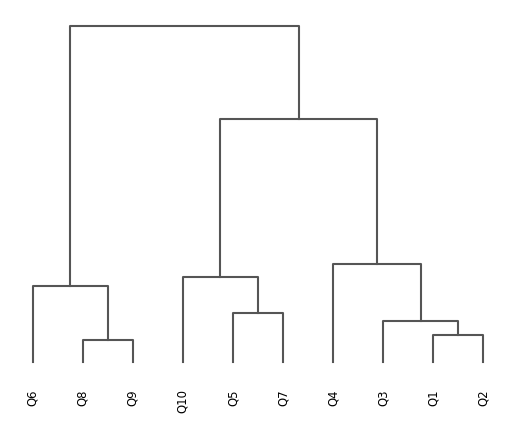

<Axes: >

In [33]:
sc.tl.dendrogram(adata, groupby="PC2_category")
sc.pl.dendrogram(adata, groupby="PC2_category")

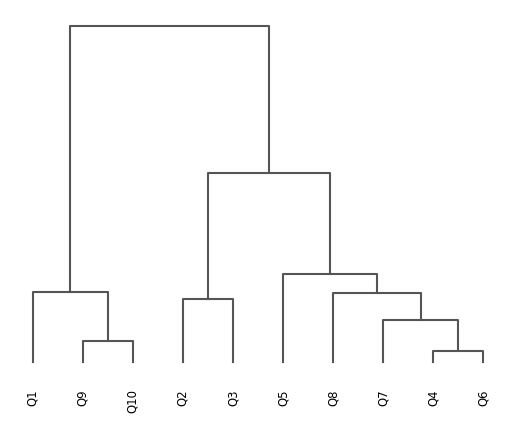

<Axes: >

In [34]:
sc.tl.dendrogram(adata, groupby="PC3_category")
sc.pl.dendrogram(adata, groupby="PC3_category")

<ipython-input-35-d9ceb7b48e96>:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 3400x800 with 0 Axes>

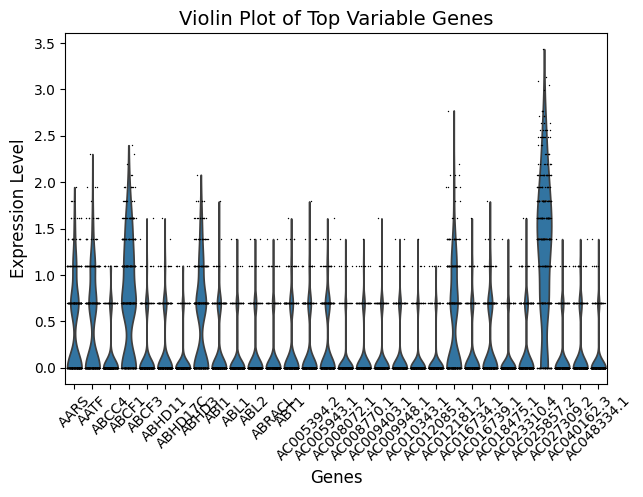

In [35]:
plt.figure(figsize=(34, 8))
sc.pl.violin(adata, keys=top_variable_genes[:30], jitter=0.4, rotation=45, groupby=None, inner="quartile", cut=0, show=False)

plt.xlabel("Genes", fontsize=12)
plt.ylabel("Expression Level", fontsize=12)
plt.title("Violin Plot of Top Variable Genes", fontsize=14)

plt.tight_layout()
plt.show()


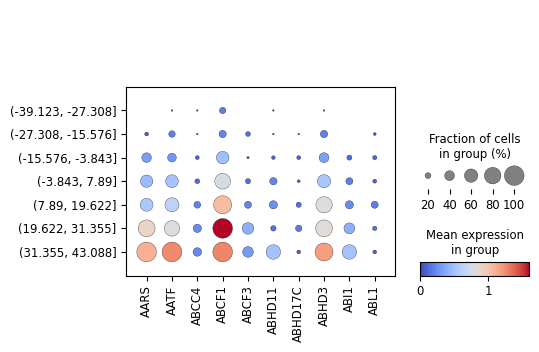

In [36]:
sc.pl.dotplot(adata,var_names=top_variable_genes[:10] ,groupby="PC1" ,cmap="coolwarm")

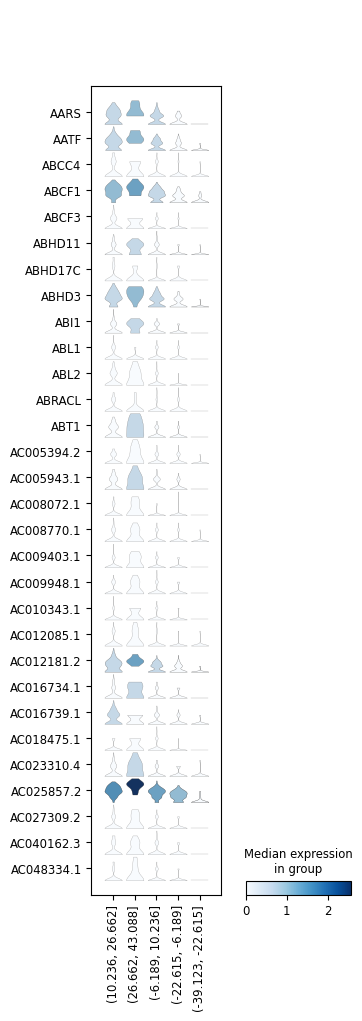

In [37]:
adata.obs["PC1_binned"] = pd.cut(adata.obs["PC1"], bins=5)


adata.obs["PC1_binned"] = adata.obs["PC1_binned"].astype(str)


sc.pl.stacked_violin(adata, var_names=top_variable_genes[:30], groupby="PC1_binned", swap_axes=True)

<Axes: xlabel='Combined Score'>

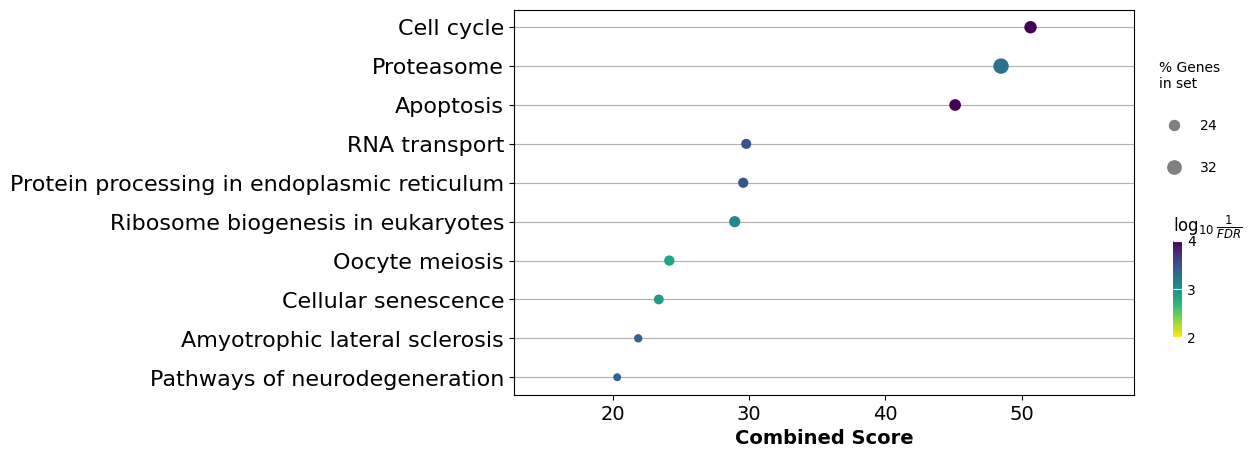

In [38]:
gp.dotplot(enrichment.res2d , figsize=(10,5))

MSigDB Hallmark 2020 (MSigDB_Hallmark_2020)

<Axes: title={'center': 'Pathway Enrichment'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

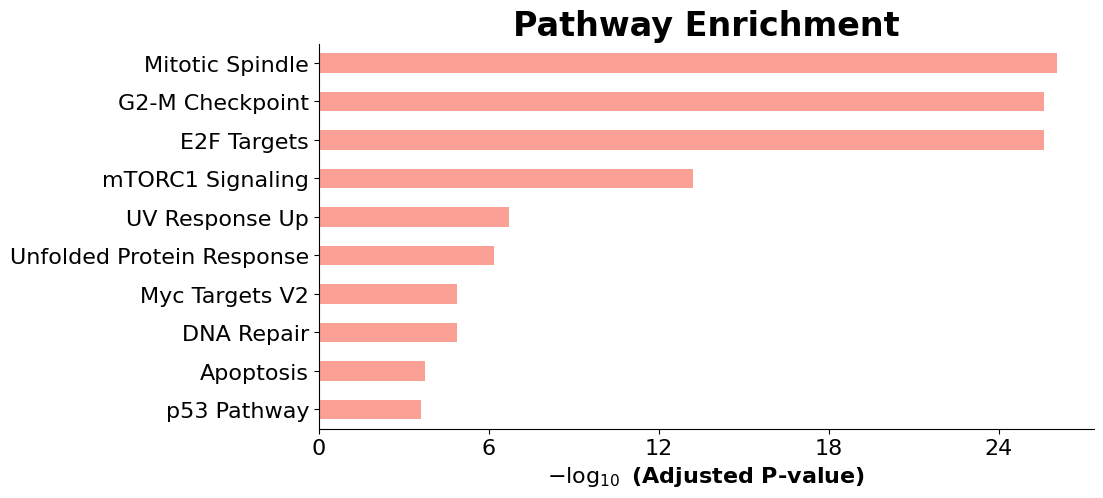

In [39]:
enrichment2 = gp.enrichr(
    gene_list=top_variable_genes,
    gene_sets="MSigDB_Hallmark_2020",
    organism="human"
)
gp.barplot(enrichment2.res2d, title="Pathway Enrichment" ,figsize=(10,5))

* **Mitotic Spindle:**  This pathway is crucial for cell division.  Its enrichment suggests that the MM cells in your sample might have dysregulated cell division, potentially contributing to uncontrolled growth.  This is a common characteristic of cancer.

* **G2-M Checkpoint:** This checkpoint is a critical control point in the cell cycle that ensures proper chromosome segregation during cell division.  Its enrichment suggests that the MM cells might have issues with cell cycle regulation and DNA repair, potentially leading to genomic instability.

* **E2F Targets:** E2F transcription factors control the expression of genes required for cell cycle progression and DNA replication.  Their enrichment suggests that the MM cells are actively proliferating and might have dysregulated control of the cell cycle.

* **mTORC1 Signaling:**  mTORC1 is a central regulator of cell growth, metabolism, and survival.  Its enrichment suggests that this pathway is hyperactive in the MM cells, potentially contributing to their growth and survival advantage.

* **UV Response Up:** This pathway is activated in response to DNA damage caused by ultraviolet (UV) radiation.  Its enrichment might suggest that the MM cells are experiencing DNA damage or have activated DNA repair mechanisms.

* **Unfolded Protein Response:** This pathway is activated when there's an accumulation of misfolded proteins in the cell.  Its enrichment suggests that the MM cells might be under endoplasmic reticulum (ER) stress, potentially due to high protein production or other cellular stresses.

* **Myc Targets V2:** Myc is a powerful oncogene that drives cell growth and proliferation.  The enrichment of its target genes suggests that Myc is highly active in the MM cells, contributing to their uncontrolled growth.

* **DNA Repair:** This pathway is essential for repairing damaged DNA.  Its enrichment could indicate that the MM cells have activated DNA repair mechanisms in response to DNA damage, possibly from chemotherapy or other cellular stresses.

* **Apoptosis:**  This is the programmed cell death pathway.  Its enrichment could be complex.  It might suggest that some cells are undergoing apoptosis, or that the MM cells have dysregulated the apoptotic pathway to avoid cell death.

* **p53 Pathway:** p53 is a tumor suppressor protein that regulates cell cycle arrest, apoptosis, and DNA repair in response to cellular stress.  Its enrichment suggests that the p53 pathway might be activated in the MM cells, possibly due to DNA damage or other stress signals.



---



* Active cell division: (Mitotic Spindle, G2-M Checkpoint, E2F Targets)
* Dysregulated growth and metabolism: (mTORC1 Signaling, Myc Targets V2)
* Cellular stress and DNA damage response: (UV Response Up, Unfolded Protein Response, DNA Repair, p53 Pathway)
* Potential evasion of apoptosis: (Apoptosis)

<Axes: title={'center': 'Pathway Enrichment'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

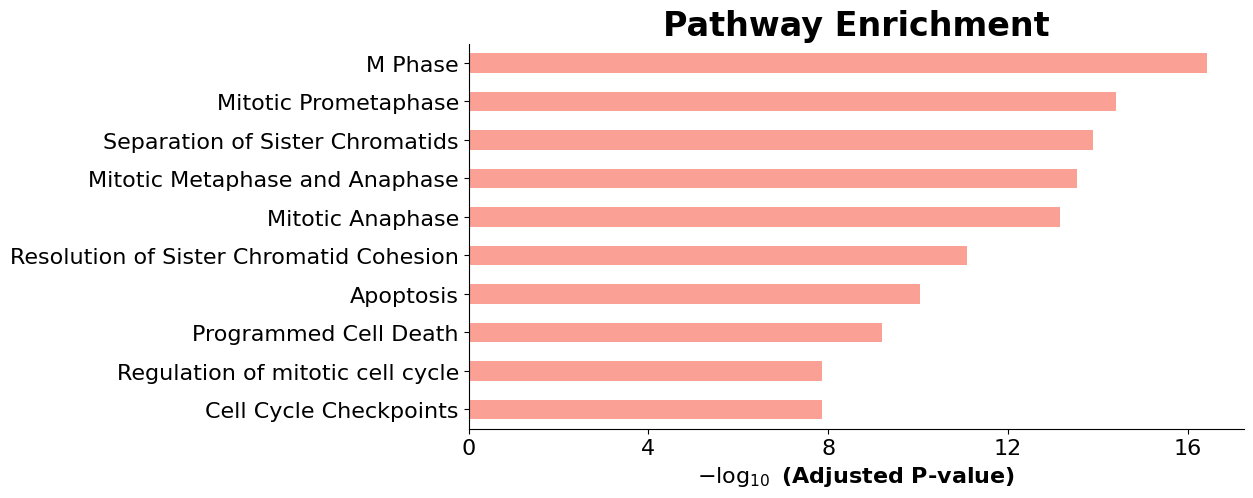

In [40]:
reactome_2015 = gp.enrichr(
    gene_list=top_variable_genes,
    gene_sets="Reactome_2015",
    organism="human"
)
gp.barplot(reactome_2015.res2d, title="Pathway Enrichment" ,figsize=(10,5))

<Axes: title={'center': 'Pathway Enrichment'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

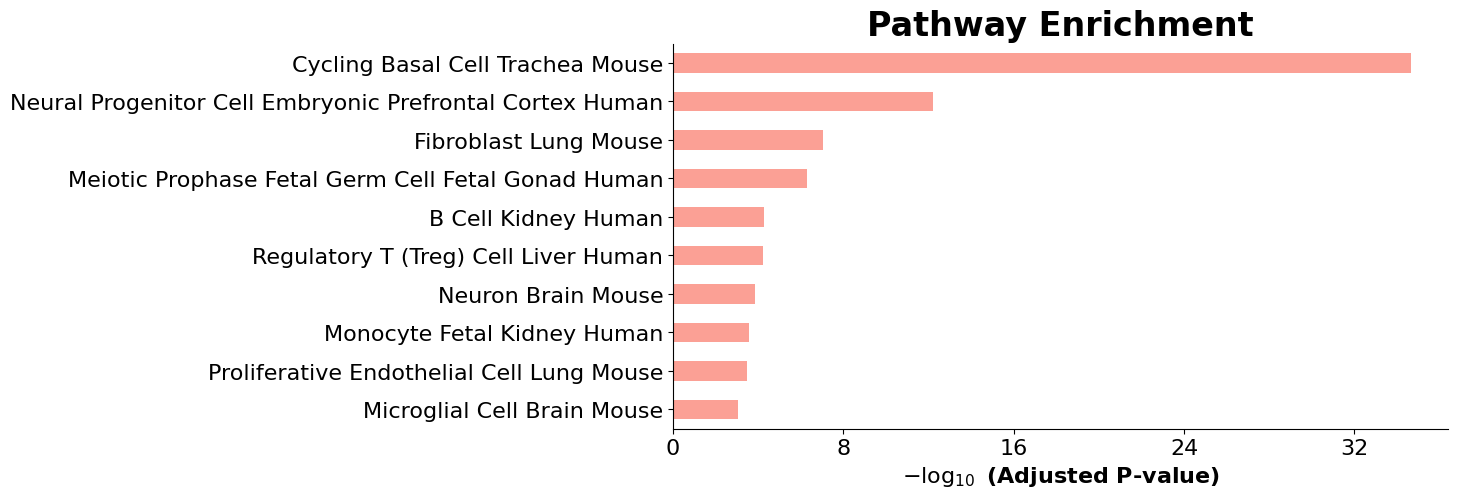

In [41]:
cellmarker = gp.enrichr(
    gene_list=top_variable_genes,
    gene_sets="CellMarker_2024",
    organism="human"
)
gp.barplot(cellmarker.res2d, title="Pathway Enrichment" ,figsize=(10,5))

<Axes: title={'center': 'Pathway Enrichment'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

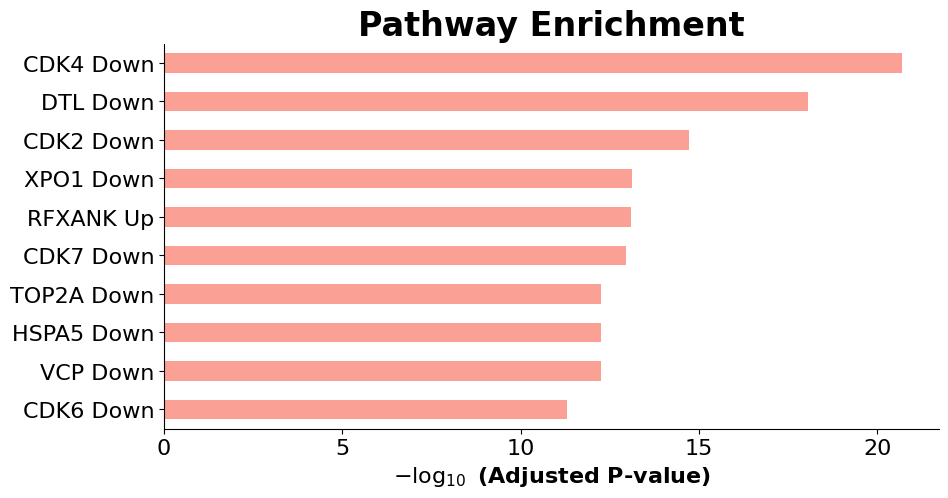

In [42]:
lincs = gp.enrichr(
    gene_list=top_variable_genes,
    gene_sets="LINCS_L1000_CRISPR_KO_Consensus_Sigs",
    organism="human"
)
gp.barplot(lincs.res2d, title="Pathway Enrichment" ,figsize=(10,5))

<Axes: title={'center': 'Pathway Enrichment'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

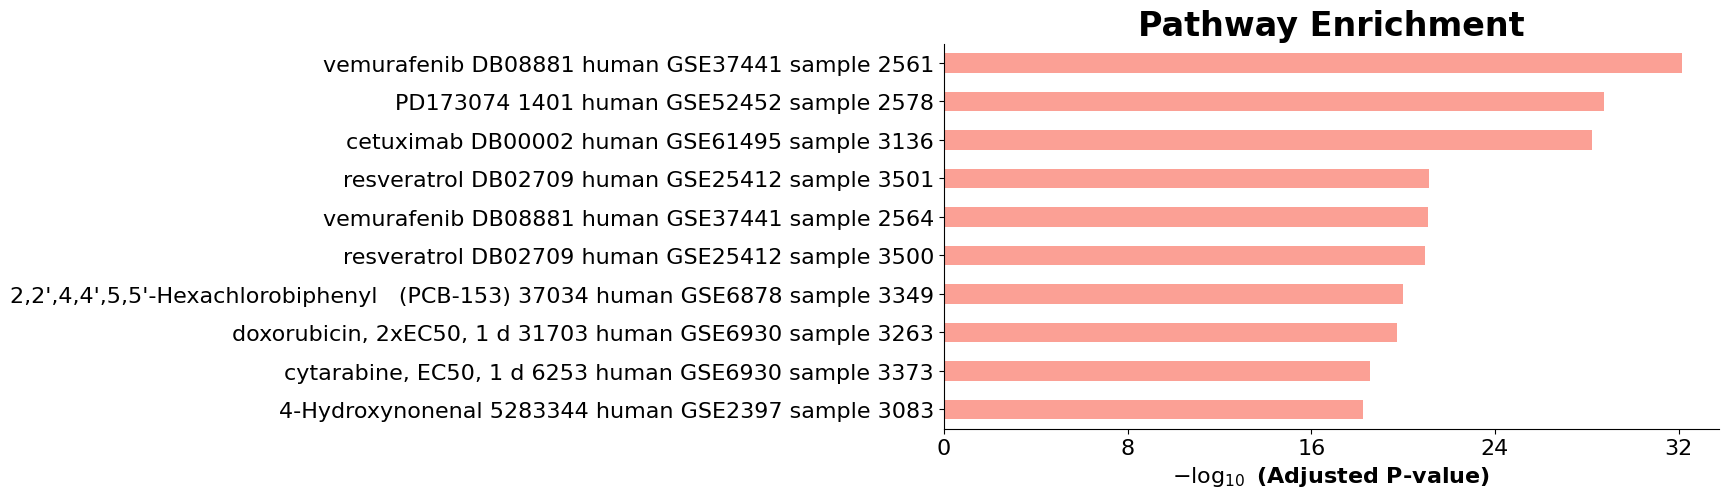

In [43]:
geo_down = gp.enrichr(
    gene_list=top_variable_genes,
    gene_sets="Drug_Perturbations_from_GEO_down",
    organism="human"
)
gp.barplot(geo_down.res2d, title="Pathway Enrichment" ,figsize=(10,5))

# Drug Perturbations from GEO on the Multiple Myeloma


* **Vemurafenib (BRAF Inhibitor):** Potentially reduces MM effects by targeting the MAPK signaling pathway, which may be aberrantly activated in some MM cells even without BRAF mutations.  This could disrupt proliferation and survival signals contributing to MM growth.  While BRAF is not a typical MM driver, the MAPK pathway can be activated through other upstream mechanisms, making Vemurafenib potentially relevant to a subset of MM cases.

* **PD173074 (FGFR Inhibitor):** Potentially inhibits MM progression by blocking Fibroblast Growth Factor Receptor (FGFR) signaling.  This could disrupt angiogenesis (blood vessel formation) and cell proliferation signals that support MM growth and survival.  FGFR signaling is implicated in some cancers, including MM, and inhibiting it might slow disease progression.

* **Cetuximab (EGFR Inhibitor):** Potentially influences MM through indirect effects on EGFR-related downstream pathways.  While EGFR is not a primary driver in MM, it could affect other signaling cascades that contribute to MM development or drug resistance.  The specific mechanisms by which Cetuximab might affect MM are unclear from this analysis and require further investigation.

* **Resveratrol (Natural Compound):** Potentially modulates multiple pathways involved in MM, including those related to cell survival, inflammation, and oxidative stress.  Due to its pleiotropic effects, it's difficult to pinpoint the exact mechanisms by which Resveratrol might affect MM.  It could potentially enhance the effects of other therapies or mitigate some side effects.

* **PCB-153 (Environmental Contaminant):** Its presence in the results is more likely indicative of potential environmental influences on MM rather than a therapeutic opportunity.  Further investigation might reveal specific pathways affected by PCB-153 in the context of MM.

* **Doxorubicin & Cytarabine (Chemotherapy Drugs):** These drugs are known to induce DNA damage and kill rapidly dividing cells, including MM cells.  Their presence in the analysis suggests that the gene signature associated with drug resistance might involve altered DNA repair mechanisms or changes in sensitivity to DNA damage.

* **4-Hydroxynonenal (Oxidative Stress Marker):** Its presence suggests that oxidative stress could be a contributing factor in MM or its resistance to therapy.  This implies that drugs or therapies that reduce oxidative stress or enhance antioxidant defenses might be beneficial in MM.

**Transcription Factors and Regulatory Elements**

<Axes: title={'center': 'Pathway Enrichment'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

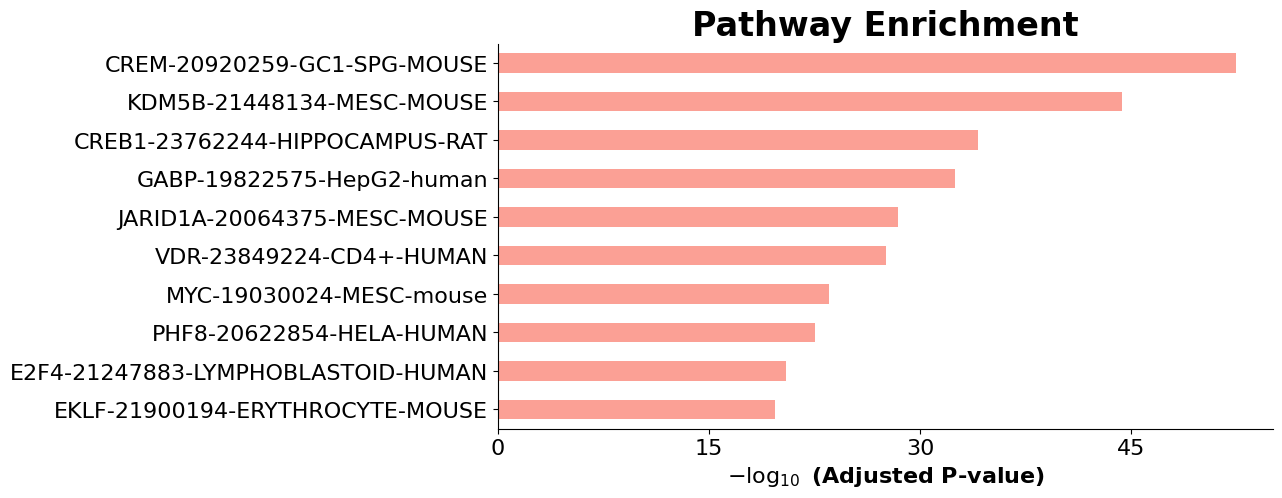

In [44]:
chEA = gp.enrichr(
    gene_list=top_variable_genes,
    gene_sets="ChEA_2013",
    organism="human"
)
gp.barplot(chEA.res2d, title="Pathway Enrichment" ,figsize=(10,5))

**CREM (cAMP Responsive Element Modulator):**

Role: Involved in cell growth, differentiation, survival, and stress response.
Potential Link to MM: Could be involved in the survival and growth of myeloma cells, or in how they respond to stress (e.g., treatment).


**KDM5B (Lysine Demethylase 5B):**
Role: A histone demethylase, affecting gene expression.
Potential Link to MM: May play a role in myeloma cell proliferation or differentiation. Some studies suggest it may be involved in cancer progression.


**CREB1 (cAMP Response Element-Binding Protein 1):**
Role: Regulates gene transcription in response to various signals.
Potential Link to MM: Could be involved in myeloma cell survival, proliferation, or response to signals from the tumor microenvironment.

**GABP (GA-Binding Protein):**
Role: A transcription factor involved in mitochondrial function and other processes.
Potential Link to MM: Mitochondrial function is important in cancer cells. GABP's role in MM is not well-established but warrants further investigation.

**JARID1A (Jumonji/ARID Domain-Containing Protein 1A):**
Role: A histone demethylase, affecting gene expression.
Potential Link to MM: May play a role in myeloma cell differentiation or proliferation. Some studies suggest it can act as a tumor suppressor in some contexts.

**VDR (Vitamin D Receptor):**
Role: Mediates the effects of Vitamin D.
Potential Link to MM: Vitamin D may have a role in MM. VDR could be involved in regulating genes related to myeloma cell growth or differentiation.

**MYC (MYC Proto-Oncogene):**
Role: A well-known oncogene, involved in cell growth, proliferation, and survival.
Potential Link to MM: MYC is often dysregulated in cancers, including MM. It likely plays a significant role in myeloma cell proliferation and survival.

**PHF8 (Plant Homeodomain Finger Protein 8):**
Role: A histone methyltransferase, affecting gene expression.
Potential Link to MM: May be involved in myeloma development or progression. Its precise role needs further study.

**E2F4 (E2F Transcription Factor 4):**
Role: Involved in cell cycle regulation.
Potential Link to MM: Could be important for the uncontrolled cell growth seen in myeloma.

**EKLF (Erythroid Krüppel-Like Factor):**
Role: A transcription factor involved in erythroid (red blood cell) development.
Potential Link to MM: Its relevance to myeloma is less clear and requires further investigation. It might be related to the differentiation status of the myeloma cells.



---



# Model Training

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix  , classification_report
from sklearn.preprocessing import StandardScaler

# Leiden Clustering:

Leiden clustering is a powerful method used to group similar data points into clusters. It is commonly used in single-cell RNA sequencing (scRNA-seq), social networks, and anomaly detection. It improves upon the Louvain algorithm by making clusters more stable and better connected.



---



How Leiden Clustering Works
1️⃣ Build a Graph (Nearest Neighbors)

Data points are treated as nodes in a graph.
Connections (edges) are based on similarity (e.g., distance in PCA space).
K-nearest neighbors (KNN) is used to find similar points.
Example: sc.pp.neighbors(adata) builds the graph.
2️⃣ Initial Clustering (Partitioning the Graph)

Leiden divides the graph into small clusters.
It optimizes clusters by maximizing modularity (cluster quality).
3️⃣ Cluster Refinement (Fixing Poorly Connected Nodes)

Weakly connected points are moved to better-fitting clusters.
Ensures all clusters are well-connected and meaningful.
Example: sc.tl.leiden(adata, resolution=0.8) assigns cluster labels.

In [46]:
import igraph
import leidenalg

In [47]:
print(adata.obs.columns)


Index(['PC1', 'PC2', 'PC3', 'PC1_category', 'PC2_category', 'PC3_category',
       'PC1_binned'],
      dtype='object')


In [48]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata,resolution=0.8)

X = adata.obsm['X_pca'][:,:3]
y = adata.obs['leiden']

<ipython-input-48-933bf57a5367>:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata,resolution=0.8)


In [49]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2 , stratify=y,random_state=42)

In [50]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [51]:
model = RandomForestClassifier(n_estimators=100, max_depth=5 ,  random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [52]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy: .4f}")

Accuracy: 0.8961


In [53]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.83      0.83      0.83        18
           2       0.89      0.94      0.91        17
           3       1.00      0.60      0.75         5
           4       1.00      1.00      1.00         5

    accuracy                           0.90        77
   macro avg       0.93      0.86      0.88        77
weighted avg       0.90      0.90      0.89        77



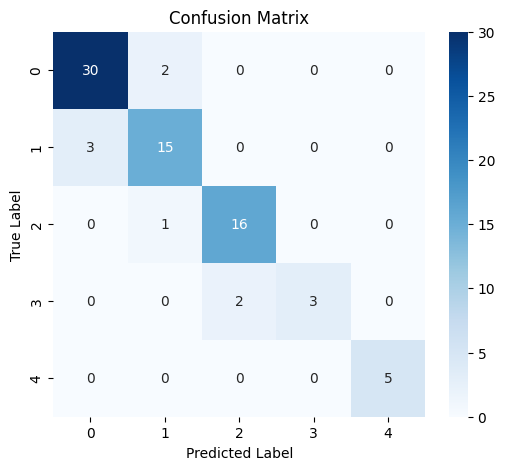

In [54]:
#Confusion Matrix

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

<ipython-input-55-1188cfbf448f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(1,4) , y=feature_importances , palette = "viridis")


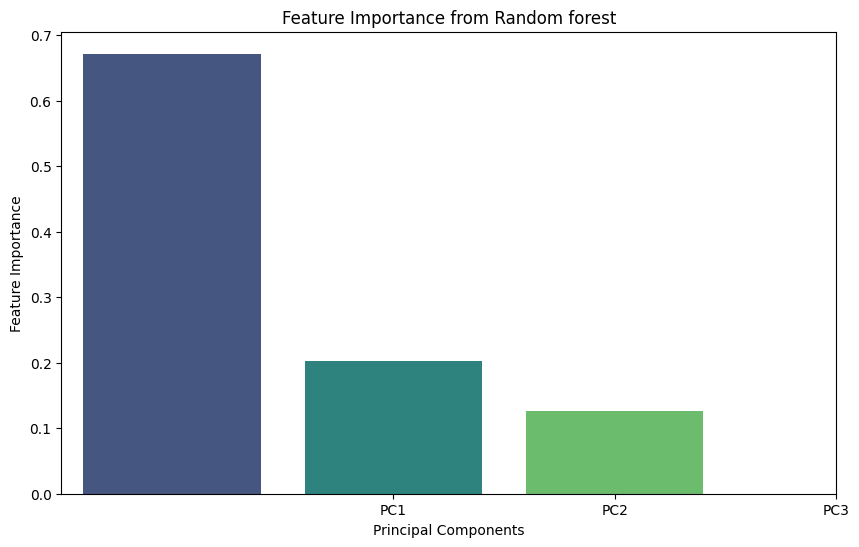

In [55]:
# Feature Importance Visualization

feature_importances = model.feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(x=np.arange(1,4) , y=feature_importances , palette = "viridis")
plt.xlabel("Principal Components")
plt.ylabel("Feature Importance")
plt.title("Feature Importance from Random forest")
plt.xticks(ticks = np.arange(1,4), labels=[f"PC{i}" for i in range(1,4)])
plt.show()

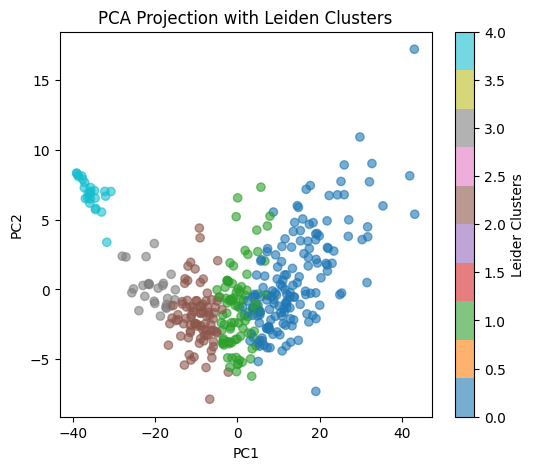

In [56]:
plt.figure(figsize=(6,5))
scatter = plt.scatter(X[:,0], X[:,1] ,c=y.astype(int) , cmap="tab10" ,alpha=0.6)
plt.colorbar(scatter,label="Leider Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection with Leiden Clusters")
plt.show()

In [57]:
feature_importances = model.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [0.67154394 0.20213561 0.12632045]


In [58]:
print(adata.shape)          # e.g., (number_of_genes, number_of_samples)
print(adata.obs_names[:5])  # Should list genes if you're clustering genes
print(adata.var_names[:5])  # Should list samples or conditions


(384, 17551)
Index(['WMC2659745', 'WMC2659746', 'WMC2659747', 'WMC2659748', 'WMC2659749'], dtype='object')
Index(['A1BG', 'A1BG-AS1', 'A2MP1', 'AAAS', 'AACS'], dtype='object')


# Reverse Engineering to find out what those clusters are ?


## Perform PCA, Neighbors, and Leiden Clustering on Genes

In [59]:
sc.pp.scale(adata)
sc.tl.pca(adata , n_comps=20)

sc.pp.neighbors(adata,n_neighbors=10)

In [60]:
sc.tl.leiden(adata,resolution=0.8)

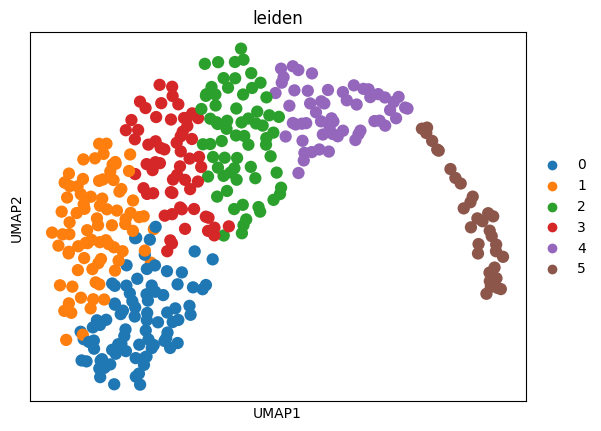

In [61]:
sc.tl.umap(adata)
sc.pl.umap(adata,color="leiden")

In [62]:
raw_data.columns = raw_data.columns.str.strip()
print('FTH1' in raw_data.columns)

False


In [63]:
print("FTH1" in adata.var_names)


True


In [64]:
gene_of_interest = "FTH1"

fth1_expression = adata[:, gene_of_interest].X

# Convert sparse matrix to dense if needed
if not isinstance(fth1_expression, np.ndarray):
    fth1_expression = fth1_expression.toarray()

# Flatten to 1D
fth1_expression = fth1_expression.flatten()

# Debugging check
print(f"Expression shape: {fth1_expression.shape}")
print(f"First 10 values: {fth1_expression[:10]}")

# Set a threshold
threshold = 0.5
mask = fth1_expression > threshold

# Ensure mask length matches obs_names
if len(mask) != len(adata.obs_names):
    raise ValueError("Mismatch between mask length and number of cells in adata.obs_names.")

cells_expressing_fth1 = adata.obs_names[mask]

# Check Leiden clustering
if 'leiden' not in adata.obs.columns:
    raise ValueError("Leiden clustering is not found in adata.obs. Run `sc.tl.leiden(adata)` first.")

# Find cluster labels for those cells
if len(cells_expressing_fth1) > 0:
    cluster_labels = adata.obs.loc[cells_expressing_fth1, 'leiden']
    print(f"Gene {gene_of_interest} is expressed in the following cells:")
    print(cells_expressing_fth1)
    print(f"These cells belong to the following Leiden clusters:")
    print(cluster_labels.unique())
else:
    print(f"Gene {gene_of_interest} is not expressed above the threshold in any cells.")

Expression shape: (384,)
First 10 values: [-0.20702339 -0.032229    0.04600333 -0.20702339  0.94005014 -0.11626144
 -3.02470636 -3.02470636 -0.99299618  0.48028553]
Gene FTH1 is expressed in the following cells:
Index(['WMC2659749', 'WMC2659758', 'WMC2659760', 'WMC2659761', 'WMC2659762',
       'WMC2659764', 'WMC2659766', 'WMC2659771', 'WMC2659773', 'WMC2659775',
       ...
       'WMC2660102', 'WMC2660104', 'WMC2660105', 'WMC2660106', 'WMC2660107',
       'WMC2660110', 'WMC2660115', 'WMC2660118', 'WMC2660120', 'WMC2660127'],
      dtype='object', length=124)
These cells belong to the following Leiden clusters:
['0', '3', '1', '2', '4']
Categories (6, object): ['0', '1', '2', '3', '4', '5']


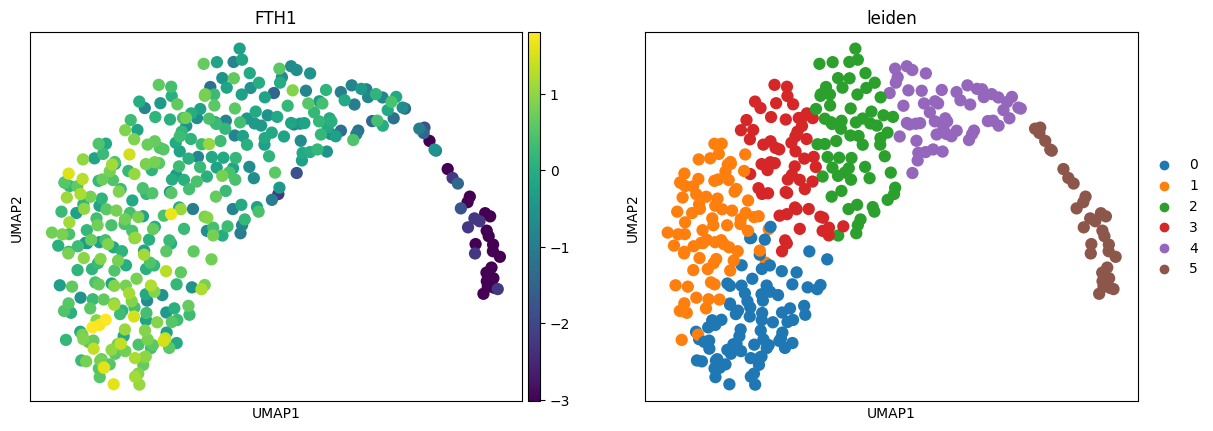

In [65]:
sc.pl.umap(adata, color=["FTH1", "leiden"])


In [70]:
threshold = 0.5


expression_matrix = adata.X.toarray() if not isinstance(adata.X, np.ndarray) else adata.X


if 'leiden' not in adata.obs.columns:
    raise ValueError("Leiden clustering is missing. Run `sc.tl.leiden(adata)`.")


expressed_genes = {}
for gene in adata.var_names:
    gene_expression = expression_matrix[:, adata.var_names.get_loc(gene)]
    mask = gene_expression > threshold
    cells_expressing = adata.obs_names[mask]

    if not cells_expressing.empty:

        clusters = list(adata.obs.loc[cells_expressing, 'leiden'].astype(str).unique())
        expressed_genes[gene] = clusters


df_results = pd.DataFrame(list(expressed_genes.items()), columns=["Gene", "Leiden Clusters"])

print(df_results)

           Gene     Leiden Clusters
0          A1BG     [1, 0, 3, 2, 4]
1      A1BG-AS1     [0, 3, 2, 4, 1]
2         A2MP1                 [0]
3          AAAS     [0, 3, 1, 4, 2]
4          AACS     [2, 0, 1, 3, 4]
...         ...                 ...
17546    snoU13        [0, 5, 1, 2]
17547  snoU2-30        [1, 3, 4, 0]
17548  snoU2_19  [2, 1, 0, 3, 5, 4]
17549   snoZ196        [1, 2, 0, 3]
17550    uc_338     [0, 1, 4, 2, 3]

[17551 rows x 2 columns]


In [71]:
df_results

,Gene,Leiden Clusters
0,A1BG,"[1, 0, 3, 2, 4]"
1,A1BG-AS1,"[0, 3, 2, 4, 1]"
2,A2MP1,[0]
3,AAAS,"[0, 3, 1, 4, 2]"
4,AACS,"[2, 0, 1, 3, 4]"
...,...,...
17546,snoU13,"[0, 5, 1, 2]"
17547,snoU2-30,"[1, 3, 4, 0]"
17548,snoU2_19,"[2, 1, 0, 3, 5, 4]"
17549,snoZ196,"[1, 2, 0, 3]"


In [74]:
single_gene_cluster_dict = df_results[df_results['Leiden Clusters'].apply(len) == 1] \
    .set_index("Gene")["Leiden Clusters"].apply(lambda x: x[0]).to_dict()

print(single_gene_cluster_dict)

{'A2MP1': '0', 'AADAC': '2', 'AANAT': '2', 'AASS': '0', 'ABALON': '4', 'ABCA11P': '3', 'ABCA8': '0', 'ABCC13': '3', 'ABHD15-AS1': '0', 'ABHD17AP8': '3', 'ABLIM3': '0', 'AC000068.3': '0', 'AC000403.1': '4', 'AC001226.2': '0', 'AC002044.3': '0', 'AC002075.2': '0', 'AC002091.2': '4', 'AC002116.2': '0', 'AC002470.1': '2', 'AC002524.1': '1', 'AC002553.3': '0', 'AC002558.1': '0', 'AC002558.3': '3', 'AC002985.2': '1', 'AC003002.4': '0', 'AC003006.1': '2', 'AC003070.2': '4', 'AC003986.3': '4', 'AC003992.1': '1', 'AC004130.1': '1', 'AC004217.1': '0', 'AC004233.1': '0', 'AC004233.4': '2', 'AC004383.1': '1', 'AC004448.2': '1', 'AC004552.1': '3', 'AC004623.1': '2', 'AC004678.1': '3', 'AC004706.1': '3', 'AC004706.3': '2', 'AC004801.2': '0', 'AC004801.6': '0', 'AC004803.1': '0', 'AC004840.1': '0', 'AC004910.1': '5', 'AC004922.1': '0', 'AC004923.4': '3', 'AC004943.1': '0', 'AC004951.1': '1', 'AC004987.2': '0', 'AC004987.3': '0', 'AC004997.1': '3', 'AC005005.3': '1', 'AC005019.2': '5', 'AC005034.5': '

In [77]:
from collections import defaultdict

cluster_gene_dict = defaultdict(list)
assigned_genes = set()

for _, row in df_results.iterrows():
    for cluster in row['Leiden Clusters']:
        gene = row['Gene']
        if gene not in assigned_genes:
            cluster_gene_dict[cluster].append(gene)
            assigned_genes.add(gene)


cluster_gene_lists = {f"{cluster}_cluster_genes": genes[:10] for cluster, genes in cluster_gene_dict.items()}


for cluster, genes in cluster_gene_lists.items():
    print(f"{cluster} = {genes}")


1_cluster_genes = ['A1BG', 'AAED1', 'AAK1', 'AAMDC', 'ABCA3', 'ABCA7', 'ABCB7', 'ABCC5', 'ABCD4', 'ABHD1']
0_cluster_genes = ['A1BG-AS1', 'A2MP1', 'AAAS', 'AARS2', 'AASDH', 'AASS', 'AATF', 'ABCA2', 'ABCA8', 'ABCB6']
2_cluster_genes = ['AACS', 'AADAC', 'AAGAB', 'AAMP', 'AANAT', 'AAR2', 'ABCC1', 'ABCE1', 'ABCG2', 'ABHD4']
4_cluster_genes = ['AARS', 'AARSD1', 'ABALON', 'ABCB10', 'ABCB8', 'ABCF2', 'ABHD14A', 'ABHD14B', 'ABHD16A', 'ABHD17C']
3_cluster_genes = ['AASDHPPT', 'ABCA11P', 'ABCA5', 'ABCC13', 'ABCG1', 'ABHD10', 'ABHD11', 'ABHD12', 'ABHD17AP8', 'ABHD18']
5_cluster_genes = ['ABI2', 'AC004910.1', 'AC005019.2', 'AC005253.1', 'AC005609.3', 'AC005699.1', 'AC005837.1', 'AC006004.1', 'AC006994.2', 'AC007224.2']




---



# Conclusions of how the genes are Clustered

**Cluster Function Analysis**

* **1_cluster:** This cluster is primarily characterized by genes involved in **transport**, particularly those belonging to the ABC transporter family (ABCA3, ABCA7, ABCB7, ABCC5, ABCD4). ABC transporters are known to transport a wide variety of substrates across cell membranes, including lipids, drugs, and other molecules. This suggests that cells in this cluster might be characterized by specific transport activities, potentially related to uptake or efflux of certain compounds.

* **0_cluster:** This cluster appears to be related to **protein synthesis and metabolism**.  It features genes like AARS2 (aminoacyl-tRNA synthetase, involved in charging tRNAs for protein translation) and AASS (involved in amino acid metabolism).  AATF, a transcription factor, is also present, suggesting potential regulatory activity related to these processes.  This indicates that cells in this cluster may be actively engaged in protein production and related metabolic pathways.

* **2_cluster:** This cluster is likely involved in various **metabolic processes**, with a focus on fatty acid and amino acid metabolism. AACS (involved in fatty acid synthesis) and AAMP (involved in amino acid metabolism) are prominent. AADAC (arylacetamide deacetylase) suggests potential involvement in detoxification or xenobiotic metabolism.  This suggests these cells have distinct metabolic profiles.

* **4_cluster:** This cluster exhibits a mix of genes related to both **protein synthesis** and **transport**. AARS and AARSD1 (aminoacyl-tRNA synthetases) point to protein synthesis activity, while ABCB10 and ABCB8 (ABC transporters) suggest involvement in transport processes. This cluster may represent cells with active protein production coupled with specific transport functions.

* **3_cluster:** This cluster appears to be involved in both **metabolism and transport**.  AASDHPPT (involved in amino acid metabolism) suggests metabolic activity, while ABCA5, ABCC13, and ABCG1 (ABC transporters) indicate transport functions.  The presence of hydrolases (ABHD11, ABHD12) further suggests involvement in metabolic breakdown or modification of molecules.

* **5_cluster:** This cluster is less clearly defined. It contains many genes with names starting with AC, which often represent unnamed or poorly characterized genes. ABI2 (involved in cell signaling) is also present.  The function of this cluster is less clear from this gene list and requires further investigation into the functions of the AC-prefixed genes.  It might represent a distinct cell population with unique or poorly understood functions.